## Library Imports

In [1]:
import numpy as np
from math import sin,cos
import math
import matplotlib.pyplot as plt

### Question 1

<img src = "../images/ex_1_p2.jpg" alt = "Ex_1_P2">

#### Initial Conditions

In [2]:
x_0 = 0.1
y_0 = 0.1
z_0 = np.array([x_0, y_0])
t = 0

#### Run Euler Scheme

In [3]:
def run_forward_euler(delta_t: float) -> None:
    x_coordinates: list = [x_0]
    y_coordinates: list = [y_0]

    z_k = z_0
    x_k = x_0
    y_k = y_0

    for i in range(0, int(30/delta_t)):
        z_k = z_k + delta_t * np.array([y_k, -x_k + (1 - x_k ** 2) * y_k])
        x_k, y_k = z_k
        x_coordinates.append(x_k)
        y_coordinates.append(y_k)

    plt.plot(x_coordinates, y_coordinates)
    plt.title(f"Forward Euler Scheme with delta t = {delta_t}")
    plt.xlabel("x(t)")
    plt.ylabel("y(t)")

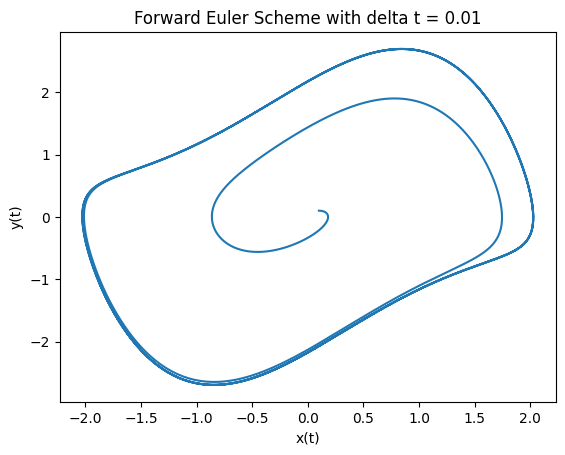

In [4]:
run_forward_euler(delta_t=0.01)

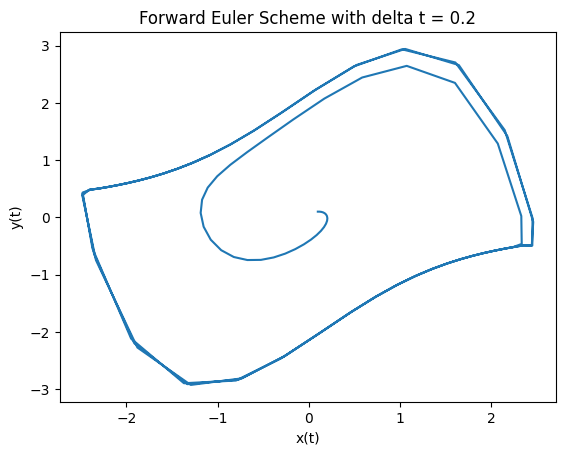

In [5]:
run_forward_euler(delta_t=0.2)

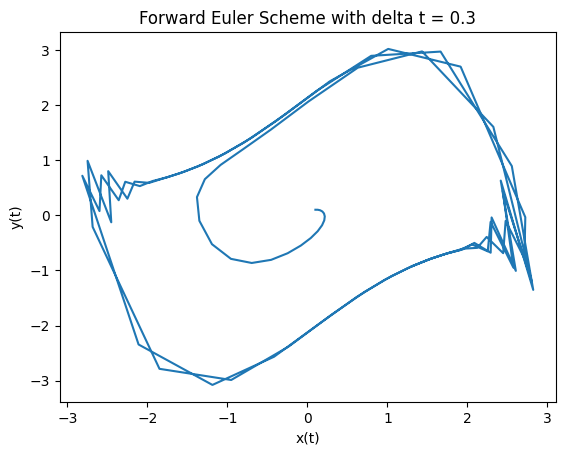

In [6]:
run_forward_euler(delta_t=0.3)

### Question 2

<img src = "../images/ex_1_p1.jpg" alt = "Ex_1_P1">

**Harmonic oscillator equation:**
$F = ma = mẍ = -kx$

Having 

$ẋ(t) = y(t)$

$ẏ(t) = -x(t)$

=> $k = 1, m = 1$


### Solution to Problem 2 A part

In [7]:
def euler_for_oscillator(x0, y0, dt, xn, m=1, k=1):

    y_list = [y0,] 
    x_list = [x0,] 

    for i in range(xn):
        for iters in range(int(1/dt)):
            y = y0 - k*dt*x0
            x = x0 + dt*y0/m

            #updating values
            x0 = x
            y0 = y

            x_list.append(x) 
            y_list.append(y)
            
        x0 = x_list[-1]
        y0 = y_list[-1]

    return x_list, y_list

In [8]:
#initial values    
x0 = 1.0
y0 = 1.0

dt = 0.01

In [9]:
x_5, y_5 = euler_for_oscillator(x0, y0, dt, xn=5)
print('Solution computed by Euler method: y(5) = ', y_5[-1])

x_10, y_10 = euler_for_oscillator(x0, y0, dt, xn=10)
print('Solution computed by Euler method: y(10) = ', y_10[-1])

Solution computed by Euler method: y(5) =  1.273925690316826
Solution computed by Euler method: y(10) =  -0.3106618221316094


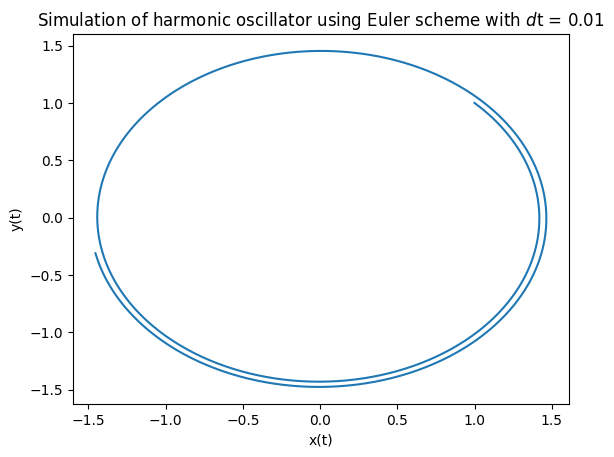

In [10]:
plt.title(f"Simulation of harmonic oscillator using Euler scheme with $d$t = {dt}")
plt.xlabel("x(t)")
plt.ylabel("y(t)")

plt.plot(x_10, y_10)

plt.show();

### Solution to Problem 2 B part

**Having a solution for y(5) and y(10) we can solve the system of 2 equations finding $x_0$, $y_0$:**

$y(5) = -x_0*sin(5)+y_0*cos(5)$

$y(10) = -x_0*sin(10)+y_0*cos(10)$

In [11]:
A = np.array([[-np.sin(5), np.cos(5)], [-np.sin(10), np.cos(10)]])
B = np.array([[1.2739], [-0.3106]])

x0 = np.linalg.solve(A, B)[0]
y0 = np.linalg.solve(A, B)[1]
print('x0 = ', x0)
print('y0 = ', y0)

x0 =  [1.0228]
y0 =  [1.03331452]


- By observing the values of var, we have $x_0 = 1.0228$ and $y_0 = 1.033$ 
- Thus we can say that the $x_0$ and $y_0$ values are very close to their true values of 1.0

### Solution to Problem 2 C part

In [12]:
dt = 0.1
x_5, y_5 = euler_for_oscillator(x0, y0, dt, xn=5)
print('Solution computed by Euler method: y(5) = ', y_5[-1])

x_10, y_10 = euler_for_oscillator(x0, y0, dt, xn=10)
print('Solution computed by Euler method: y(10) = ', y_10[-1])


Solution computed by Euler method: y(5) =  [1.61857829]
Solution computed by Euler method: y(10) =  [-0.58792915]


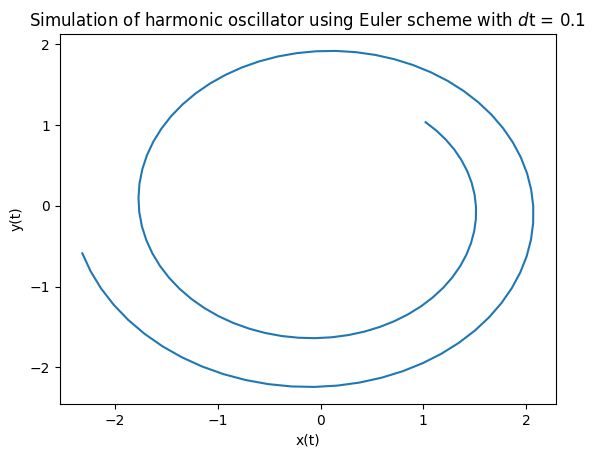

In [13]:
plt.title(f"Simulation of harmonic oscillator using Euler scheme with $d$t = {dt}")
plt.xlabel("x(t)")
plt.ylabel("y(t)")

plt.plot(x_10, y_10)

plt.show();

In [14]:
A = np.array([[-np.sin(5), np.cos(5)], [-np.sin(10), np.cos(10)]])
B = np.array([[1.6185], [-0.5879]])

x0 = np.linalg.solve(A, B)[0]
y0 = np.linalg.solve(A, B)[1]
print('x0 = ', x0)
print('y0 = ', y0)

x0 =  [1.24230067]
y0 =  [1.50611449]


- By observing the values of $y(5), y(10), x_0, y_0$, we can say that increasing the value of dt, makes the model more error prone.
- This is mainly because we update the $x$ and $y$ for less number of times before getting out the observations